## Figure 1A 

In [1]:
load("data/Figure1A.rdata")

Warning message:
"package 'pheatmap' was built under R version 3.6.2"
Warning message:
"package 'gplots' was built under R version 3.6.2"

Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess




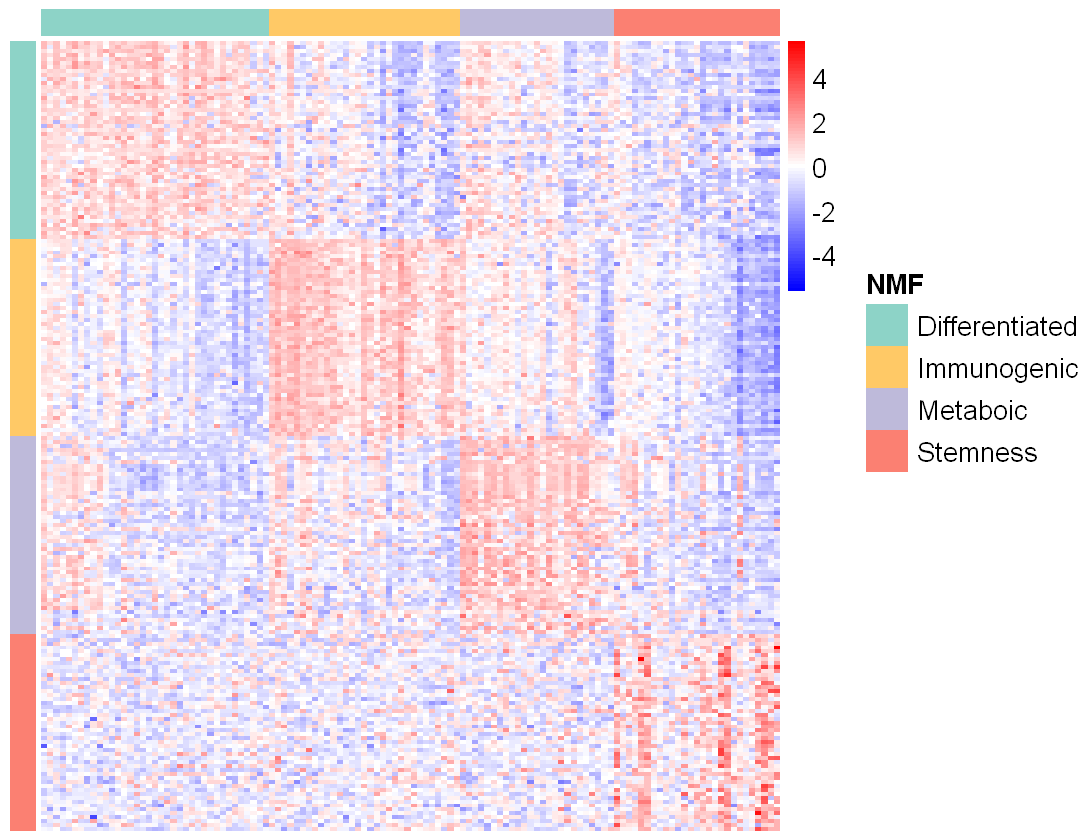

In [2]:
library(pheatmap)
library(gplots)
options(repr.plot.width=9,rerp.plot.height=10)
pheatmap(data,annotation_col = anno_col,annotation_row = anno_row,annotation_colors = anno_color,scale="row",col=bluered(75),annotation_names_col = FALSE,
         annotation_names_row = FALSE,
         cluster_cols = F,cluster_rows = F,show_colnames = F,show_rownames = F,fontsize = 16)

## Figure 1B

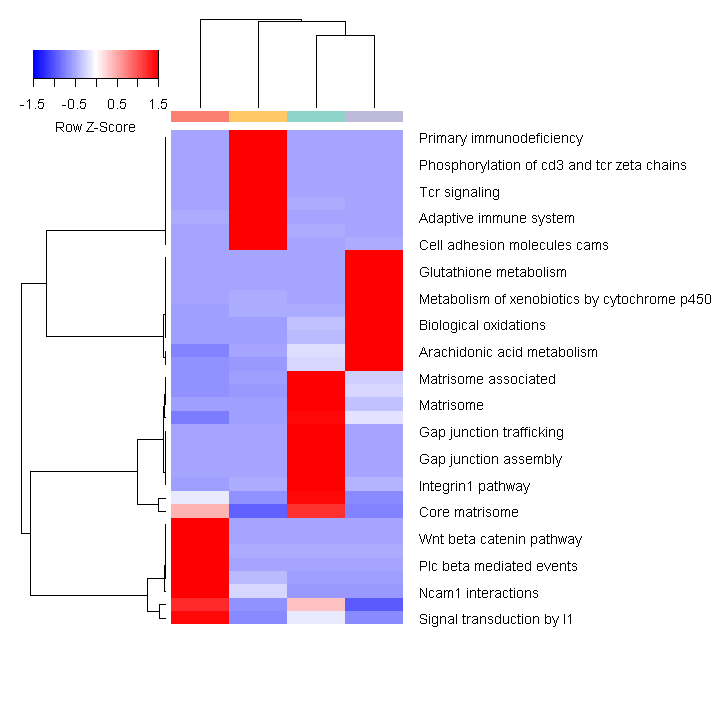

In [3]:
scolors=c("#8DD3C7","#FFC966","#BEBADA","#FB8072")
load("data/Figure1B.rdata")
str_change=function(x){
    strs = unlist(strsplit(x,"_"))
    strs=strs[2:length(strs)]
    strs=lapply(strs,tolower)
    strs=paste(strs,sep="",collapse = " ")
    paste0(toupper(substring(strs, 1,1)),substring(strs, 2,nchar(strs)))
    }
    
options(repr.plot.height=6,repr.plot.width=6)
rownames(data)=lapply(gsea$ID,str_change)
names(scolors)=colnames(gsea[2:5])               
par(oma=c(1,1,1,15))               
heatmap.2(data,ColSideColors = scolors,distfun=function(x) as.dist(1-cor(t(x))),cexRow=1.035,lwid =c(1,2),
          col=bluered(75),scale="row",trace = "none", density.info = "none",key.title=NA,labCol=NA,lhei = c(1,6),keysize=2,
      key.par=list(mar=c(2,1,2,0.5), cex=0.7, cex.lab=1.0, cex.axis=1.0))

## Figure 1 D 

Warning message:
"package 'survival' was built under R version 3.6.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 3.6.3"
Loading required package: magrittr



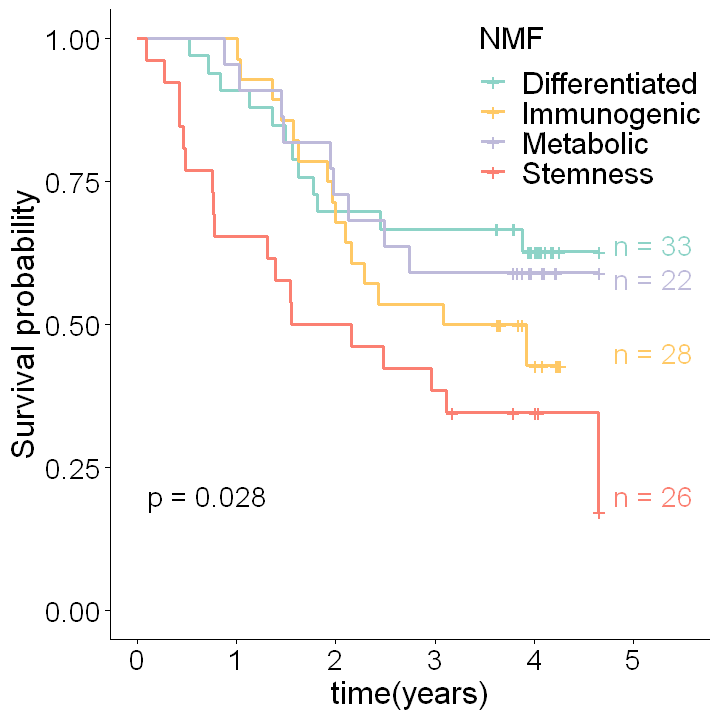

In [4]:
load("data/Figure1D.rdata")
library(survival)
library(survminer)
fit=survfit(Surv(time, status)~nmf, data = NMF_cluster_survival)
p=ggsurvplot(fit, legend.title="NMF",palette=scolors,xlab=("time(years)"),font.x=c(19),font.y=c(19),
             font.legend=c(18),legend=c(0.8,0.85),font.tickslab=c(17),
             pval.size=6,pval=T,
             legend.labs=c("Differentiated","Immunogenic","Metabolic","Stemness"),xlim=c(0,5.5),
             risk.table=FALSE,data=NMF_cluster_survival)
p$plot = p$plot + ggplot2::annotate("text",x=5.2,y=0.64,label="n = 33",colour="#8DD3C7",size=6)
p$plot = p$plot + ggplot2::annotate("text",x=5.2,y=0.58,label="n = 22",colour="#BEBADA",size=6)
p$plot = p$plot + ggplot2::annotate("text",x=5.2,y=0.45,label="n = 28",colour="#FFC966",size=6)
p$plot = p$plot + ggplot2::annotate("text",x=5.2,y=0.20,label="n = 26",colour="#FB8072",size=6)
p

## Figure1 E

Call:
coxph(formula = Surv(newdata$time, newdata$event) ~ gene, data = newdata)

  n= 65, number of events= 24 

        coef exp(coef) se(coef)     z Pr(>|z|)  
gene1 0.9092    2.4824   0.4218 2.156   0.0311 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

      exp(coef) exp(-coef) lower .95 upper .95
gene1     2.482     0.4028     1.086     5.674

Concordance= 0.595  (se = 0.052 )
Likelihood ratio test= 4.85  on 1 df,   p=0.03
Wald test            = 4.65  on 1 df,   p=0.03
Score (logrank) test = 4.98  on 1 df,   p=0.03


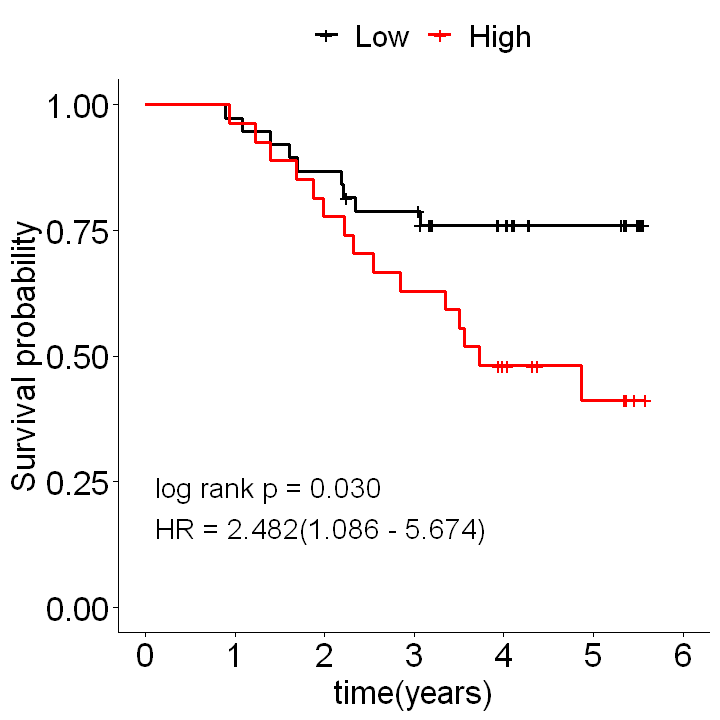

In [5]:
load("data/Figure1E.rdata")
surv_cut=surv_cutpoint(time = "time",event="event",variables = c("gene"),data=RTPCRdata,minprop = 0.25)
surv_cat=surv_categorize(surv_cut,variables = c("gene"),labels=c(0,1))
newdata=cbind(surv_cat,RTPCRdata[c("sex","age","smoke","drink","T","N","TNM")])
newdata$gene=factor(newdata$gene)
summary(coxph(Surv(newdata$time,newdata$event)~gene,data=newdata),digits=4)
# the pvalue was originated from the above result
pval="log rank p = 0.030\nHR = 2.482(1.086 - 5.674)"
ggsurvplot(survfit(Surv(newdata$time/365,newdata$event)~gene,data=newdata),
           pval=pval,legend.title="",legend.labs=c("Low","High"),xlab="time(years)",
           palette = c("black","red"),risk.table = FALSE,pval.size = 6,#pval.coord=c(1.6,0.94),
             font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),font.legend=c(18))
        

## Figure 2A

In [6]:
load("data/Fig2A.rdata")

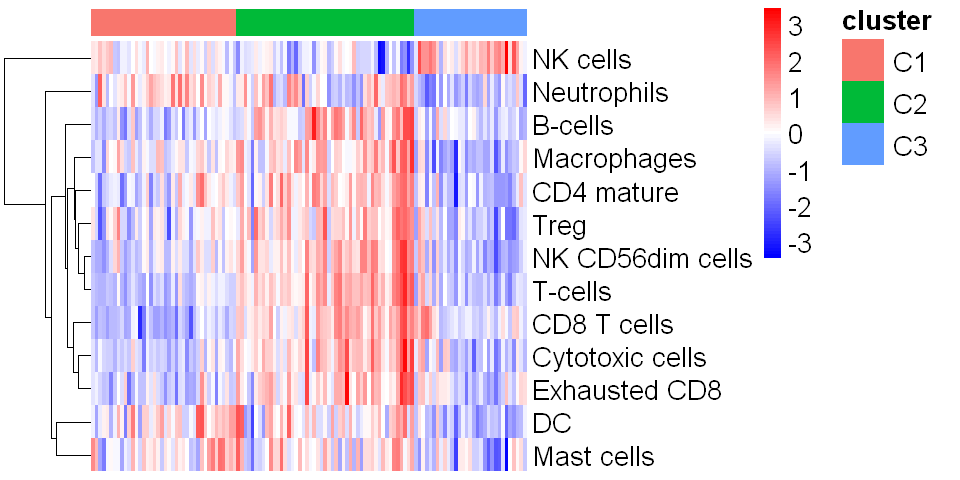

In [7]:
options(repr.plot.width=8,repr.plot.height=4)

gg_color_hue <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}
mycolors=gg_color_hue(3)
names(mycolors)=c("C1","C2","C3")
anno_cols=list(cluster=mycolors)
pheatmap(clusters$data,col=bluered(75),scale="row",show_colnames = F,annotation_col=clusters$annotation,fontsize=16,
         cluster_cols = F,clustering_distance_rows = "correlation",clustering_method="average",fontsize_row=16, annotation_names_col = FALSE,
         annotation_colors=anno_cols,border_color = NA,
         width=12,height=4)

## Figure 2B

In [8]:
load("data/Fig2B.rdata")

Warning message in wilcox.test.default(x, y):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x, y):
"cannot compute exact p-value with ties"


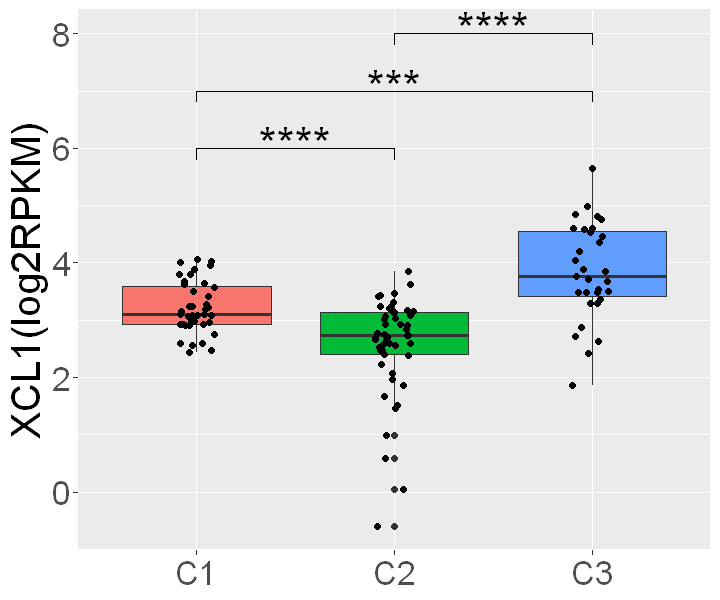

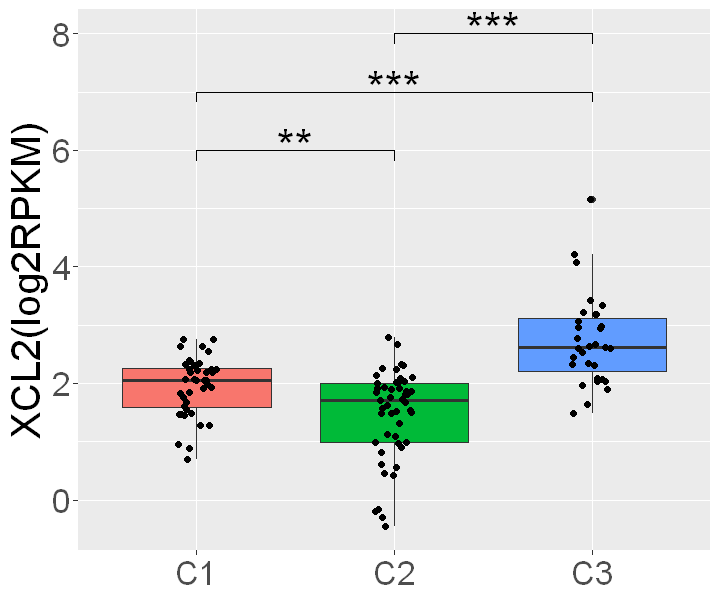

In [9]:
sig_anno=function(x,y){
    wt=wilcox.test(x,y)
    if (wt$p.value<0.0001) 
    {sym="****"
    } else if (wt$p.value<0.001) 
    {sym="***"
    }else if (wt$p.value<0.01) 
    {sym="**"
    }else if (wt$p.value<0.05) 
    {sym="*"
    }  else if (wt$p.value<0.05) 
    {sym="·"
    }else {sym="ns"}
     sym
}
library(reshape2)
dat=melt(data,id="Cluster")
express_nk_markers=data#prepare for Figure 2F
## XCL1
annotations=c(sig_anno(data$XCL1[data$Cluster=="C1"],data$XCL1[data$Cluster=="C2"]),
             sig_anno(data$XCL1[data$Cluster=="C1"],data$XCL1[data$Cluster=="C3"]),
             sig_anno(data$XCL1[data$Cluster=="C2"],data$XCL1[data$Cluster=="C3"]))
options(repr.plot.width=6,repr.plot.height=5)
ggplot(subset(dat,variable=="XCL1"),aes(x=Cluster,y=value,fill=Cluster))+
    geom_boxplot()+geom_jitter(width=0.1)+ ylab(label = "XCL1(log2RPKM)")+
      geom_signif(comparisons = list(c(1, 2),c(1,3),c(2,3)),y_position=c(6, 7,8),test = "t.test",annotations=annotations,
                  map_signif_level=TRUE,textsize = 10,vjust=0.5) + 
     theme(axis.text = element_text(size=20),
           axis.title.y = element_text(size=24),
           axis.title.x=element_blank(),
          legend.position="none")
## XCL2
annotations=c(sig_anno(data$XCL2[data$Cluster=="C1"],data$XCL2[data$Cluster=="C2"]),
             sig_anno(data$XCL2[data$Cluster=="C1"],data$XCL2[data$Cluster=="C3"]),
             sig_anno(data$XCL2[data$Cluster=="C2"],data$XCL2[data$Cluster=="C3"]))
ggplot(subset(dat,variable=="XCL2"),aes(x=Cluster,y=value,fill=Cluster))+
    geom_boxplot()+geom_jitter(width=0.1)+ ylab(label = "XCL2(log2RPKM)")+
      geom_signif(comparisons = list(c(1, 2),c(1,3),c(2,3)),y_position=c(6, 7,8),
                  map_signif_level=TRUE,textsize = 10,vjust=0.5) + 
     theme(axis.text= element_text(size=20),
           axis.title.y = element_text(size=24),
           axis.title.x=element_blank(),
          legend.position="none")

## Figure 2C

In [10]:
load("data/Fig2C.rdata")
da_cut=surv_cutpoint(data = danaher_survival,time = "time",event="status",variables = colnames(danaher_survival[3:ncol(danaher_survival)]),minprop = 0.20)
da_cat=surv_categorize(da_cut,labels = c(0,1))
da_cut=data.frame(summary(da_cut))

  |======================================================================| 100%

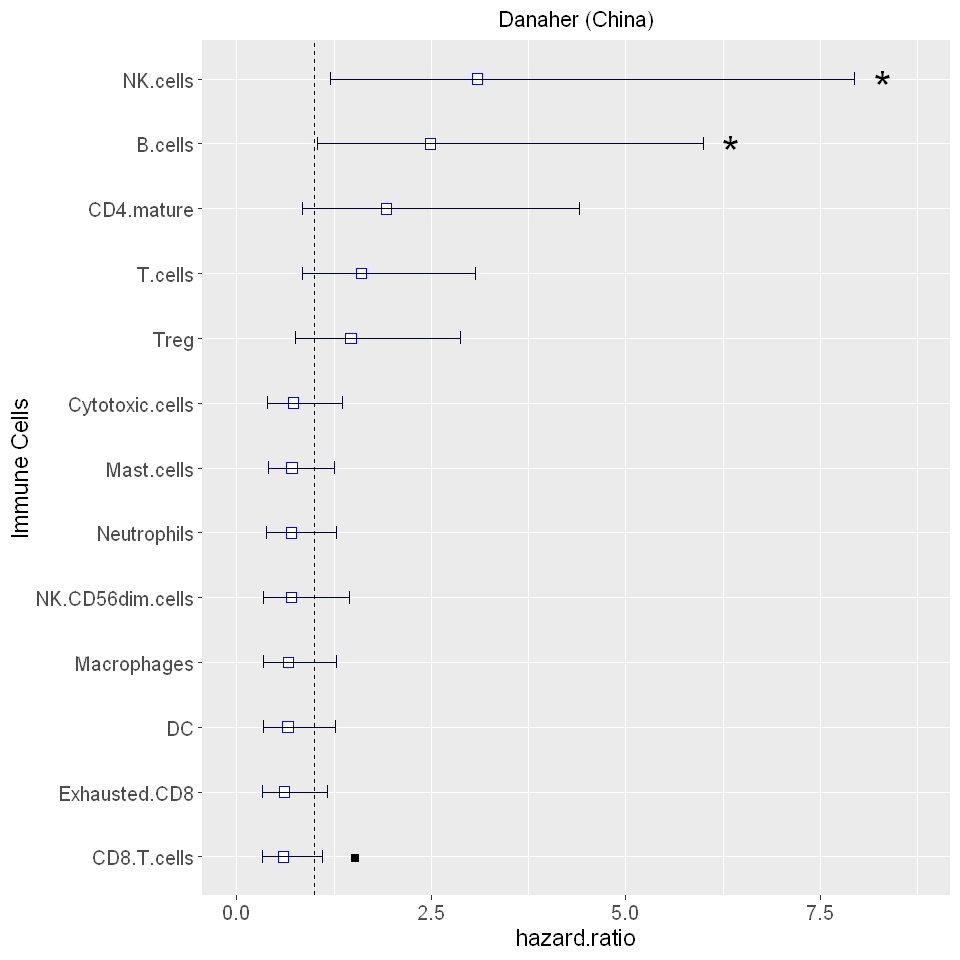

In [11]:
hazard.ratio=function(x,time,event){
    newdata=data.frame(time=time,event=event,x=x)
    newdata=cbind(newdata,surdata[,c("sex","age","smoke","drink","T_stage","G_stage")])#this the new line added 20190904, 
    result=summary(coxph(Surv(time,event)~x+sex+age+smoke+drink+T_stage+G_stage,data=newdata))
    result=data.frame(cbind(result$conf.int,result$coefficients[,5]))
    colnames(result)=c("hazard.ratio","exp(-coef)","lower","upper","pvalue")
    result[1,]
    }

hz=NULL
for ( x in rownames(da_cut)){
 tmp=NULL
 tmp=hazard.ratio(da_cat[,x],da_cat$time,da_cat$status)
 hz=rbind(hz,c(x,da_cut[x,1],tmp$hazard.ratio,tmp$lower,tmp$upper,tmp$pvalue))
}

colnames(hz)=c("cell","cutpoint","hazard.ratio","lower","upper","pvalue")

hz=data.frame(hz)
hz$source=rep("danaher",nrow(hz))
hz$hazard.ratio=as.numeric(as.character(hz$hazard.ratio))
hz=hz[order(hz$hazard.ratio),]
hz$lower=as.numeric(as.character(hz$lower))
hz$upper=as.numeric(as.character(hz$upper))
hz$pvalue=as.numeric(as.character(hz$pvalue))
hz$cell=factor(hz$cell,levels = hz$cell)


 sigvalue=function(x){
     if (x <=0.001) {y="***"}
     else if (x<=0.01 & x >0.001) {y="**"}
     else if (x <=0.05 & x>0.01) {y="*"}
     else if (x<=0.1 & x>0.05) {y="·"}
     else {y=""}
     y
 }

hz$signif=lapply(hz$pvalue,sigvalue)

options(repr.plot.width=8,repr.plot.height=8)
ggplot(data=hz,aes(x=hazard.ratio,y=cell))+
geom_point(size=3, color="blue", fill="white", shape=22)+
geom_errorbarh(aes(xmin=lower,xmax=upper),height=0.2,cex=0.5,colour="#000033")+
geom_vline(xintercept = 1,linetype=2)+
geom_text(data=subset(hz,pvalue<=0.05),aes(x=upper+0.25,y=cell,label=signif),hjust=0,vjust=1, nudge_y = 0.15,size=10)+
geom_text(data=subset(hz,pvalue<=0.10 & pvalue>0.05),aes(x=upper+0.25,y=cell,label=signif),hjust=0,vjust=0.5, nudge_y = 0,size=18)+
xlim(0,max(hz$upper)+0.8)+
labs(title="Danaher (China)")+
scale_y_discrete(name="Immune Cells",limits=as.character(hz$cell))+
theme(plot.title = element_text(hjust = 0.5),
    axis.text=element_text(size=12),
    axis.title=element_text(size=14)
)


In [12]:
hz[13,]

,cell,cutpoint,hazard.ratio,lower,upper,pvalue,source,signif
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<list>
9,NK.cells,2.01827109873021,3.089546,1.202285,7.939294,0.01915314,danaher,*


## Figure 2D

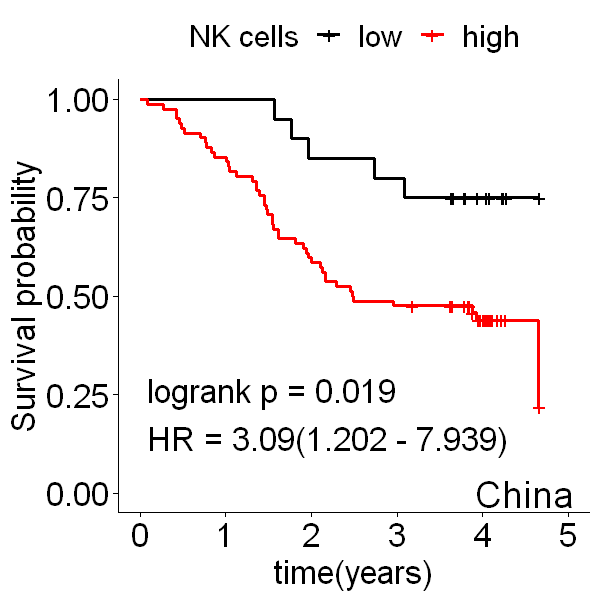

In [13]:
survplot=function(fit,data,pval,legend.title=NULL,legend.labs=NULL,risktable=FALSE){
    
    if ( risktable==FALSE) {
        p=ggsurvplot(fit,data,pval=pval,legend.title=legend.title,xlab="time(years)",newpage=T,
           legend.labs=legend.labs,palette = c("black","red"),risk.table = FALSE,pval.size = 7,
             font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),font.legend=c(18))
        }
        
    else{
        p=ggsurvplot(fit,data,pval=pval,legend.title=legend.title,xlab="time(years)",newpage=T,
           legend.labs=legend.labs,palette = c("black","red"),pval.size = 7,
            font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),font.legend=c(18),      
           risk.table = TRUE, risk.table.height=0.15,risk.table.y.text= F,
           risk.table.title="",risk.table.col = "strata",
           tables.theme=theme(axis.title=element_blank(),axis.text=element_blank(),
                  axis.line = element_blank(),axis.ticks=element_blank(),legend.position = "none"))
    }
    
}
data=data.frame(time=round(da_cat$time/12,2),event=da_cat$status,x=factor(da_cat[,"NK.cells"]))
survobj=Surv(data$time,data$event)
fit=survfit(survobj~x,data=data)
pval=paste0("logrank p = ", round(hz[13,"pvalue"],3),"\nHR = ",round(hz[13,"hazard.ratio"],3),"(",round(hz[13,"lower"],3)," - ",round(hz[13,"upper"],3),")")
options(repr.plot.width=5,repr.plot.height=5)
p1=survplot(fit,data,pval=pval,legend.title="NK cells",legend.labs=c("low","high"),risktable=F)
p1$plot=p1$plot+
              ggplot2::annotate("text", 
                                x = 4.5, y = 0.0, 
                                label = "China", size =8)
p1

In [14]:
load("data/Fig2D_tcga.rdata")
tcga_cut=surv_cutpoint(data = tcgadata,time = "t.os",event="e.os",variables = colnames(tcga),minprop = 0.2)
tcga_cat=surv_categorize(tcga_cut,labels = c(0,1))
tcga_cut=data.frame(summary(tcga_cut))

hazard.ratio=function(x,time,event){
    newdata=data.frame(time=time,event=event,x=x)
    newdata=cbind(newdata,tcgasurv[,c("sex","age","smoke","T_stage","G_stage")])#this the new line added 20190904, 
    result=summary(coxph(Surv(time,event)~x+sex+age+smoke+T_stage+G_stage,data=newdata))
    result=data.frame(cbind(result$conf.int,result$coefficients[,5]))
    colnames(result)=c("hazard.ratio","exp(-coef)","lower","upper","pvalue")
    result[1,]
    }

tcgahz=summary(coxph(Surv(tcga_cat$t.os,tcga_cat$e.os)~NK.cells,tcga_cat))





  |======================================================================| 100%

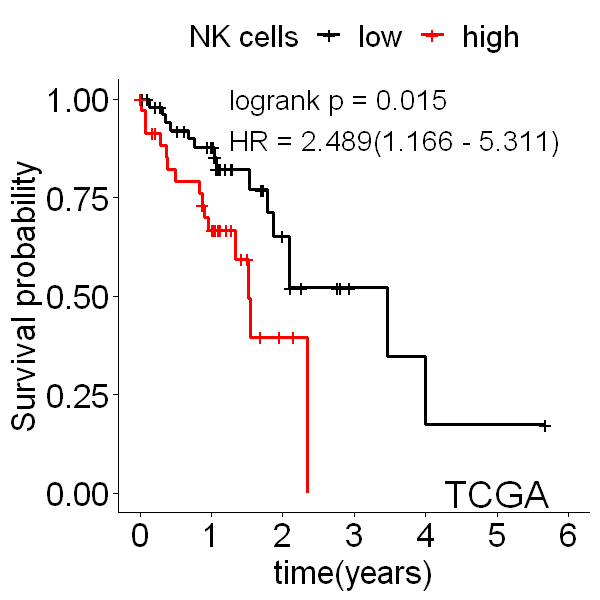

In [15]:
data=data.frame(time=round(tcga_cat$t.os/365,2),event=tcga_cat$e.os,x=factor(tcga_cat[,"NK.cells"]))
survobj=Surv(data$time,data$event)
fit=survfit(survobj~x,data=data)
pval=paste0("logrank p = ", round(tcgahz$sctest[3],3),"\nHR = ",round(tcgahz$conf.int[1,1],3),
            "(",round(tcgahz$conf.int[1,3],3)," - ",round(tcgahz$conf.int[1,4],3),")")
options(repr.plot.width=5,repr.plot.height=5)
#p=survplot(fit,data,pval=pval,legend.title="NK cells",legend.labs=c("low","high"),risktable=F)
p2=ggsurvplot(fit,data,legend.title="NK cells",
             xlab="time(years)",newpage=T,
             legend.labs=c("low","high"),
             palette = c("black","red"),
             pval.size = 6,pval=pval,pval.coord=c(1.25,0.95),
             font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),font.legend=c(18),      
             risk.table = FALSE)

p2$plot=p2$plot+
              ggplot2::annotate("text", 
                                x = 5, y = 0.0, 
                                label = "TCGA", size =8)
p2

## Fig 2E

In [16]:
NMF_immune=cbind(clusters$annotation,anno_col[rownames(clusters$annotation),])
fisher.test(table(NMF_immune),workspace = 2e8)


	Fisher's Exact Test for Count Data

data:  table(NMF_immune)
p-value = 9.26e-11
alternative hypothesis: two.sided


In [17]:
table(NMF_immune)

       anno_col[rownames(clusters$annotation), ]
cluster Differentiated Immunogenic Metaboic Stemness
     C1             21           1        9        9
     C2              8          28       10        3
     C3              8           2        6       15

In [18]:
NMF_immune=as.data.frame(table(NMF_immune))
colnames(NMF_immune)=c("cluster","NMF","count")

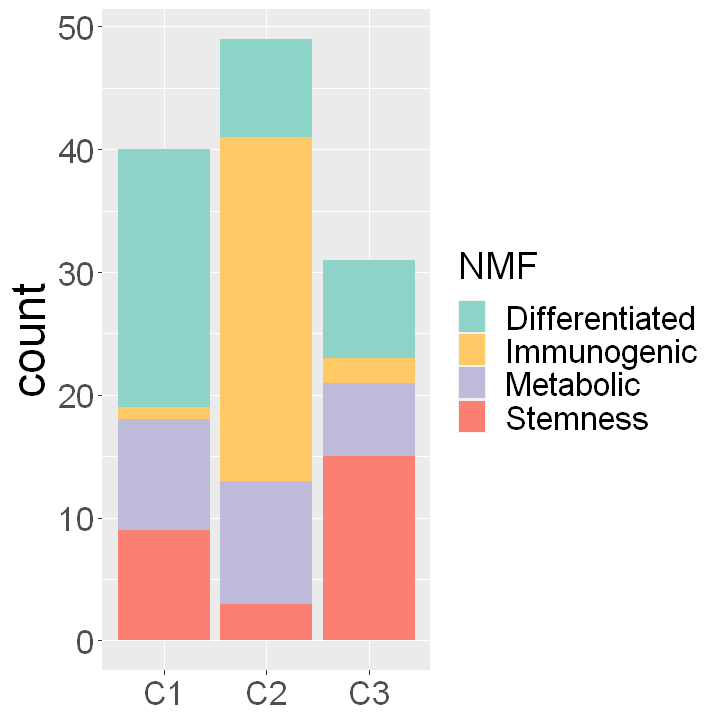

In [19]:
options(repr.plot.width=6,repr.plot.height=6)
ggplot(NMF_immune,aes(x=cluster,y=count,fill=NMF))+
scale_fill_manual(values=c("#8DD3C7", "#FFC966", "#BEBADA","#FB8072"),
                labels=c("Differentiated", "Immunogenic", "Metabolic","Stemness"))+
geom_bar(position="stack", stat="identity")+
     theme(axis.text = element_text(size=20),
           axis.title.y = element_text(size=28),
           axis.title.x=element_blank(),
          legend.title=element_text(size=22),
           legend.text=element_text(size=20)
          )
    

## Fig 2F

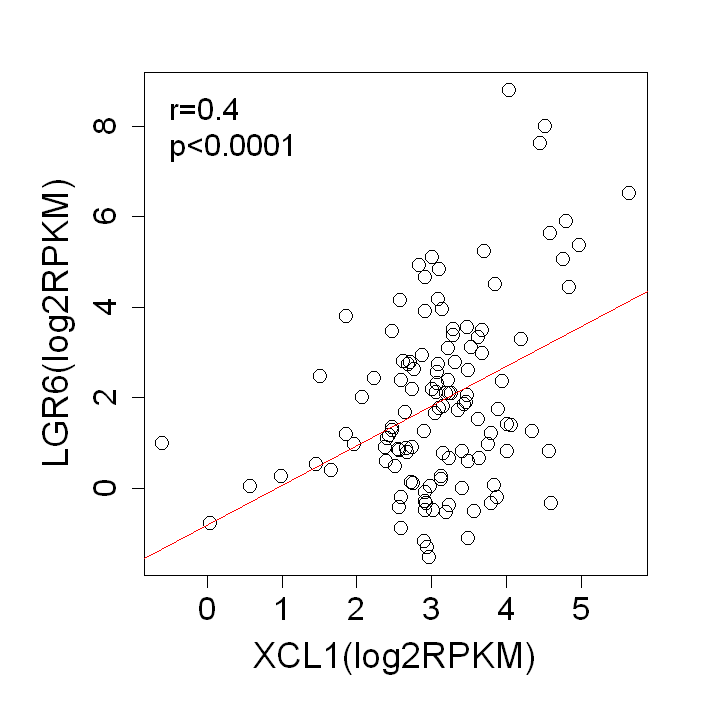

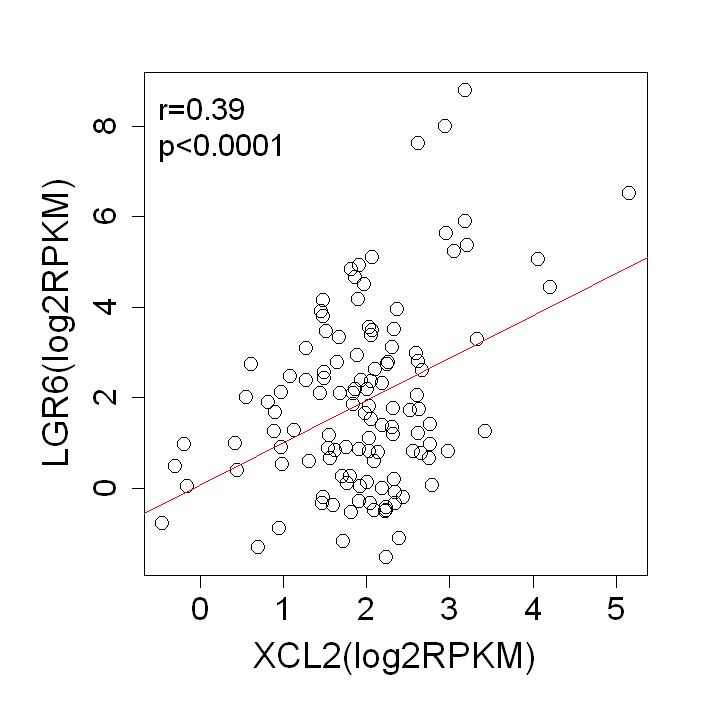

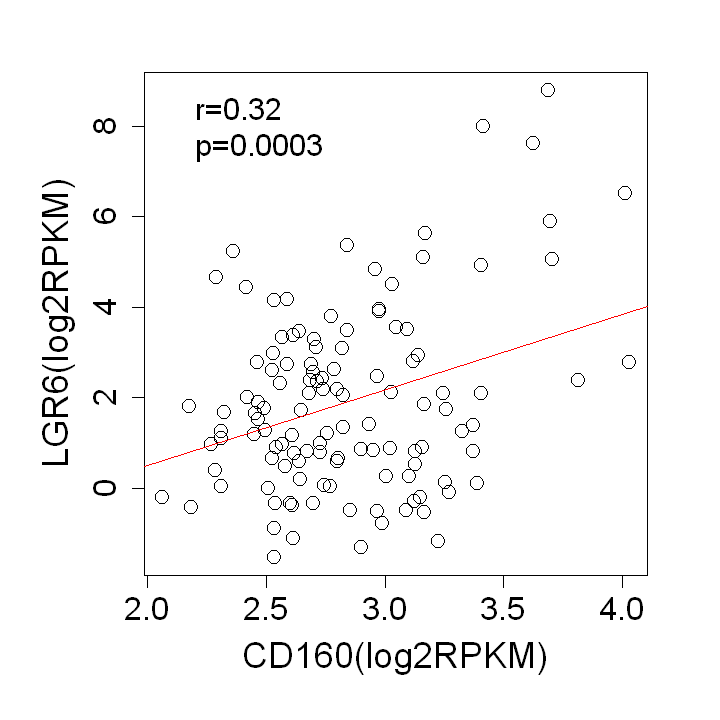

In [20]:
par(mar=c(6,6,3,3))
plot(LGR6~XCL1,express_nk_markers,cex=1.5,cex.lab=1.8,cex.axis=1.6,ylab="LGR6(log2RPKM)",xlab="XCL1(log2RPKM)")
abline(lm(LGR6~XCL1,express_nk_markers),col='red')
correlation=cor.test(express_nk_markers$LGR6,express_nk_markers$XCL1)
text(-0.5,8,labels=paste0("r=",round(correlation$estimate,2),"\n","p<0.0001"),adj=0,cex=1.5)

plot(LGR6~XCL2,express_nk_markers,cex=1.5,cex.lab=1.8,cex.axis=1.6,ylab="LGR6(log2RPKM)",xlab="XCL2(log2RPKM)")
abline(lm(LGR6~XCL2,express_nk_markers),col='red')
correlation=cor.test(express_nk_markers$LGR6,express_nk_markers$XCL2)
# correlation$p.value = 8.19585693389646e-06
text(-0.5,8,labels=paste0("r=",round(correlation$estimate,2),"\n","p<0.0001"),adj=0,cex=1.5)

plot(LGR6~CD160,express_nk_markers,cex=1.5,cex.lab=1.8,cex.axis=1.6,ylab="LGR6(log2RPKM)",xlab="CD160(log2RPKM)")
abline(lm(LGR6~CD160,express_nk_markers),col='red')
correlation=cor.test(express_nk_markers$LGR6,express_nk_markers$CD160)
text(2.2,8,labels=paste0("r=",round(correlation$estimate,2),"\n","p=0.0003"),adj=0,cex=1.5)
